### STAT 504 HW2

#### V.A. Suchar

### 1. Read data in a dataframe

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv"
df = pd.read_csv(url)
print df.head()

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

### 2. Create a new DataFrame that only contains the 5-star and 1-star reviews

In [2]:
df15=df[(df.stars==1)|(df.stars==5)]

# Transform 1 star to 0 and 5 star to 1 and add it as rating
rating=np.where(df15.stars==5, 1, 0)
df15.loc[:,'rating']=pd.Series(rating, index=df15.index)
print df15.head()

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6  zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   
6  Drop what you're doing and drive here. After I...  review   

                  user_id  cool  useful  funny  rating  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0       1  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0       1  
3  uZetl9T0

C:\Users\vasiles\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\vasiles\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


##### NOTE: FOR THE ANALYSIS "RATING" WILL BE USED INSTEAD OF "STARS" WITH 0 = 1 STAR & 1 = 5 STARS

### 3. Use a random seed 1234567, split the new DataFrame into training and testing sets, using the review text as the feature and the star rating as the response variable

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df15.text, df15.rating, random_state=1234567)

print X_train.shape
print X_test.shape

(3064L,)
(1022L,)


### 4. Use CountVectorizer to create document-term matrices from X_train and X_test

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_dtm = vectorizer.fit_transform(X_train)
test_dtm = vectorizer.transform(X_test)

print train_dtm.shape
print test_dtm.shape

(3064, 16726)
(1022, 16726)


### 5. Use Logistic Regression, k-Nearest Neighbors, Classification Tree to predict the star rating for reviews in the testing set, and calculate the AUC and plot the ROC Curve for the three models.

#### 5.1 Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = train_dtm
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions

# store the predicted probabilites of class 1
lg_pred_prob = logreg.predict_proba(X)[:, 1]
# rating 5 is col 0 rating 1 is col 1
y_pred_rating=logreg.predict(test_dtm)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# Print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_rating)

0.936399217221
[[152  31]
 [ 34 805]]


##### Calculate the AUC

In [6]:
y_pred_prob = logreg.predict_proba(test_dtm)[:, 1]
lg_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)

0.956697734097


##### Plot the ROC curve

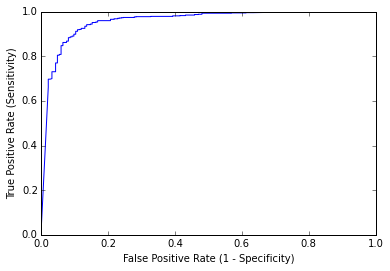

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
lg_fpr, lg_tpr, lg_thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(lg_fpr, lg_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

#### k-Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
knn_pred_rating = knn.predict(X) # class predictions

# store the predicted probabilites of class 1
knn_pred_prob = knn.predict_proba(X)[:, 1]
# rating 5 is col 0 rating 1 is col 1
y_pred_rating=knn.predict(test_dtm)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# Print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_rating)

0.821917808219
[[  6 177]
 [  5 834]]


##### Calculate the AUC

In [9]:
y_pred_prob = knn.predict_proba(test_dtm)[:, 1]
knn_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)

0.735536059712


##### Plot the ROC curve

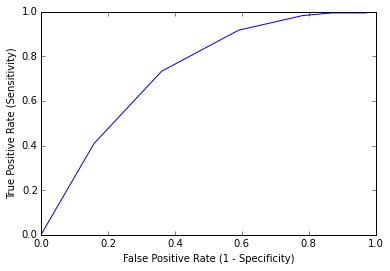

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(knn_fpr, knn_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [11]:
# NOTE: 
# Since the results are changing with each no of neighbors
# we have to search for the best k and then re-do the above analysis
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 50
# k_range = range(1, 3065) #size of training dataset
# training_error = []
# testing_error = []
# for k in k_range:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    # training error
#    knn.fit(X, y)
#    y_pred = knn.predict(X)
#    training_error.append(1 - metrics.accuracy_score(y, y_pred))
        
#    # testing error
#    knn.fit(X_train, y_train)
#   y_pred = knn.predict(X_test)
#    testing_error.append(1 - metrics.accuracy_score(y_test, y_pred))

# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# # plot the relationship between K (HIGH TO LOW) and TESTING ERROR
# plt.plot(k_range, testing_error)
# plt.gca().invert_xaxis()
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Error')

# Choose a value and repeat the above...

#### Classification Tree

In [12]:
from sklearn import tree
clt = tree.DecisionTreeClassifier()
clt.fit(X, y)
clt_pred_rating=clt.predict(X) # class predictions

# store the predicted probabilites of class 1
clt_pred_prob=clt.predict_proba(X)[:, 1]

# rating 5 is col 0 rating 1 is col 1
y_pred_rating=clt.predict(test_dtm)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# Print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_rating)

0.857142857143
[[107  76]
 [ 70 769]]


##### Calculate the AUC

In [13]:
y_pred_prob = clt.predict_proba(test_dtm)[:, 1]
clt_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)

0.750633397813


##### Plot the ROC curve

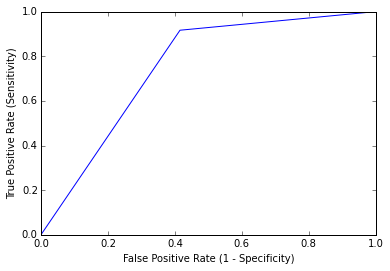

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
clt_fpr, clt_tpr, clt_thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(clt_fpr, clt_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

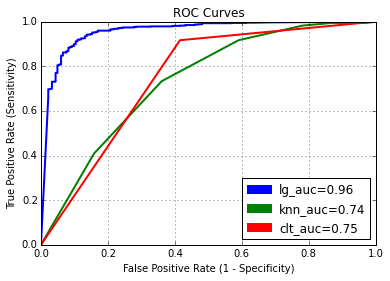

In [15]:
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.plot(lg_fpr, lg_tpr, knn_fpr, knn_tpr, clt_fpr, clt_tpr, linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
blue_patch = mpatches.Patch(color='blue', label='lg_auc=0.96')
green_patch= mpatches.Patch(color='green', label='knn_auc=0.74')
red_patch= mpatches.Patch(color='red', label='clt_auc=0.75')
plt.legend(handles=[blue_patch, green_patch, red_patch], loc=4)
plt.grid(True)

### 6. Add vote types (cool/useful/funny) as an additional features into the modeling process and refit the three models to predict the star rating in the testing set, and calculate the AUC and plot the ROC Curve for the three models. Any improvement or not? Comment on your findings.

##### Subset only cool, useful, funny, and rating columns, from the DataFrame with 1&5 stars

#### Add all ROC curves on the same plot

In [16]:
df2=df15[['cool','useful','funny']]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, df15.rating, random_state=1234567)

print X_train.shape
print X_test.shape

(3064, 3)
(1022, 3)


#### 5.1 Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions

# store the predicted probabilites of class 1
lg_pred_prob = logreg.predict_proba(X)[:, 1]
# rating 5 is col 0 rating 1 is col 1
y_pred_rating=logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# Print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_rating)

0.834637964775
[[ 24 159]
 [ 10 829]]


##### Calculate the AUC

In [18]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
lg_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)

0.674433524167


##### Plot the ROC curve

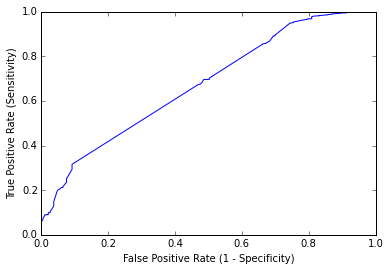

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
lg_fpr, lg_tpr, lg_thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(lg_fpr, lg_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

#### k-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
knn_pred_rating = knn.predict(X) # class predictions

# store the predicted probabilites of class 1
knn_pred_prob = knn.predict_proba(X)[:, 1]
# rating 5 is col 0 rating 1 is col 1
y_pred_rating=knn.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# Print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_rating)

0.827788649706
[[ 25 158]
 [ 18 821]]


##### Calculate the AUC

In [21]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)

0.651455349525


##### Plot the ROC curve

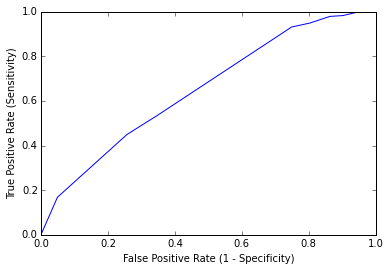

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(knn_fpr, knn_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

#### Classification Tree

In [23]:
from sklearn import tree
clt = tree.DecisionTreeClassifier()
clt.fit(X, y)
clt_pred_rating=clt.predict(X) # class predictions

# store the predicted probabilites of class 1
clt_pred_prob=clt.predict_proba(X)[:, 1]

# rating 5 is col 0 rating 1 is col 1
y_pred_rating=clt.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# Print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_rating)

0.824853228963
[[ 29 154]
 [ 25 814]]


##### Calculate the AUC

In [24]:
y_pred_prob = clt.predict_proba(X_test)[:, 1]
clt_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)

0.620387919524


##### Plot the ROC curve

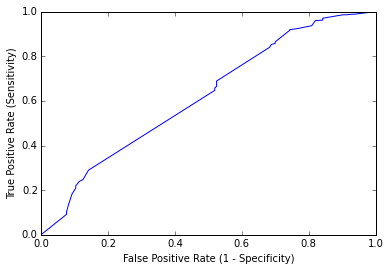

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
clt_fpr, clt_tpr, clt_thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(clt_fpr, clt_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

#### Add all ROC curves on the same plot

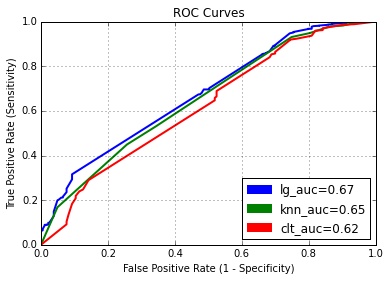

In [26]:
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.plot(lg_fpr, lg_tpr, knn_fpr, knn_tpr, clt_fpr, clt_tpr, linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
blue_patch = mpatches.Patch(color='blue', label='lg_auc=0.67')
green_patch= mpatches.Patch(color='green', label='knn_auc=0.65')
red_patch= mpatches.Patch(color='red', label='clt_auc=0.62')
plt.legend(handles=[blue_patch, green_patch, red_patch], loc=4)
plt.grid(True)

##### There are no improvements in the model fit. By far logistic regression based on the document-term matrix seem to perform the best (AUC=0.96). k-Nearest Neighbors and Classification Tree methods have similar performance (AUC=0.74 &0.75, respectively). All three methods have similar AUCs (0.67, 0.65, & 0.62) for vote types (cool/useful/funny). 